# Exploratory Data Analysis

In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
from proj1_helpers import *
%load_ext autoreload
%autoreload 2

In [2]:
# Data loading
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

## General data info

In [3]:
y.shape

(250000,)

In [4]:
tX.shape

(250000, 30)

In [5]:
ids.shape

(250000,)

In [6]:
ids

array([100000, 100001, 100002, ..., 349997, 349998, 349999])

We find that we have 250'000 data points, each to be correlated with 30 features.
Each data point also has an id ranging from 100'000 to 349'999, I expect the offset of 100'000 to be chosen such that each id contains 6 digits.

## Having a look at the features

In [7]:
index = np.linspace(1, tX.shape[0], tX.shape[0])

### Feature 1

In [8]:
feature_1 = tX[:,0]
feature_1

array([ 138.47 ,  160.937, -999.   , ...,  105.457,   94.951, -999.   ])

Text(0.5, 1.0, 'Feature 1 distribution')

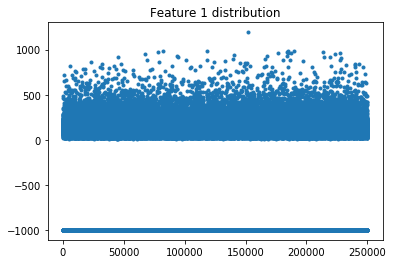

In [9]:
plt.scatter(index, feature_1, marker='.')
plt.title("Feature 1 distribution")

We see that we have some feature points located at -999. They might represent a missing feature in this case. It's not a case of true/false, since data points that are not -999 range between 0 and 1000.

In [10]:
#let's remove the -999
cleaned_feature = []
for x in feature_1:
    if x != -999:
        cleaned_feature.append(x)
len(cleaned_feature)

211886

Text(0.5, 1.0, 'Feature 1 distribution without -999')

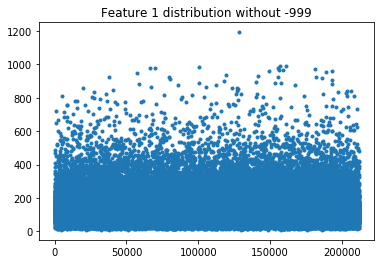

In [11]:
cleaned_index = [i for i in range(len(cleaned_feature))]
plt.scatter(cleaned_index, cleaned_feature, marker='.')
plt.title("Feature 1 distribution without -999")

Text(0.5, 1.0, 'Boxplot for feature 1')

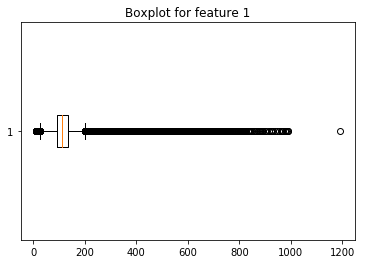

In [12]:
plt.boxplot(cleaned_feature, vert=False)
plt.title("Boxplot for feature 1")

Text(0.5, 1.0, 'Boxplot for feature 1 without outliers')

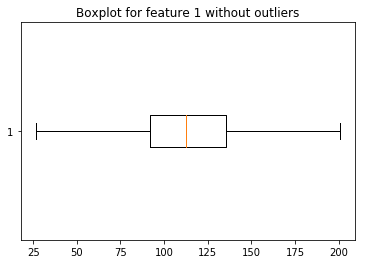

In [13]:
plt.boxplot(cleaned_feature, vert=False, showfliers=False)
plt.title("Boxplot for feature 1 without outliers")

We see that the remaining data has a ton of outliers towards the top.
According to the boxplot without outliers, the significant data ranges from around 25 to around 200. A massive cleaning of this feature might be needed.

### Feature 2

In [14]:
feature_2 = tX[:,1]
feature_2

array([ 51.655,  68.768, 162.172, ...,  60.526,  19.362,  72.756])

Text(0.5, 1.0, 'Feature 2 distribution')

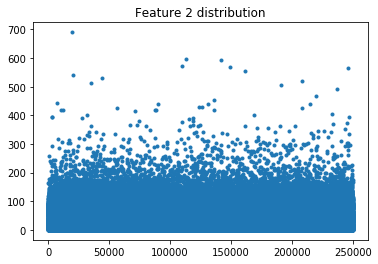

In [15]:
plt.scatter(index, feature_2, marker='.')
plt.title("Feature 2 distribution")

Text(0.5, 1.0, 'Boxplot for feature 2')

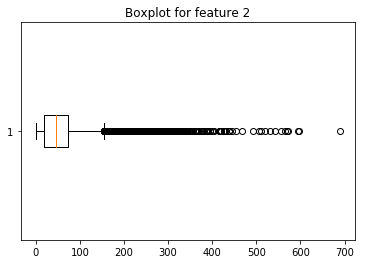

In [16]:
plt.boxplot(feature_2, vert=False)
plt.title("Boxplot for feature 2")

Text(0.5, 1.0, 'Boxplot for feature 2 without outliers')

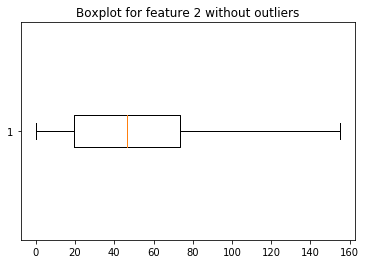

In [17]:
plt.boxplot(feature_2, vert=False, showfliers=False)
plt.title("Boxplot for feature 2 without outliers")

This time, the data doesn't have -999 points, but there still are a lot of outliers. It would be good to check if those outliers are the same as in feature 1.

Significant data seems contained in range 0 to 160

### Feature 3

In [18]:
feature_3 = tX[:,2]
feature_3

array([ 97.827, 103.235, 125.953, ...,  75.839,  68.812,  70.831])

Text(0.5, 1.0, 'Feature 3 distribution')

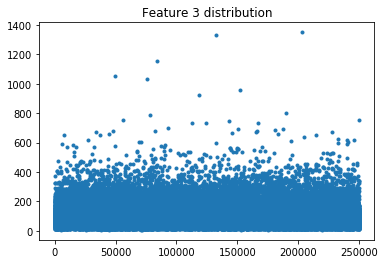

In [19]:
plt.scatter(index, feature_3, marker='.')
plt.title("Feature 3 distribution")

Text(0.5, 1.0, 'Boxplot for feature 3')

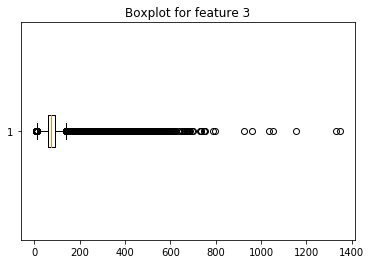

In [20]:
plt.boxplot(feature_3, vert=False)
plt.title("Boxplot for feature 3")

Text(0.5, 1.0, 'Boxplot for feature 3 without outliers')

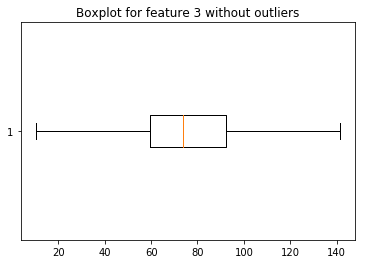

In [21]:
plt.boxplot(feature_3, vert=False, showfliers=False)
plt.title("Boxplot for feature 3 without outliers")

Same conclusions as feature 2, significant data seems contained in range 0 to 140

### Feature 4

In [22]:
feature_4 = tX[:,3]
feature_4

array([27.98 , 48.146, 35.635, ..., 39.757, 13.504,  7.479])

Text(0.5, 1.0, 'Feature 4 distribution')

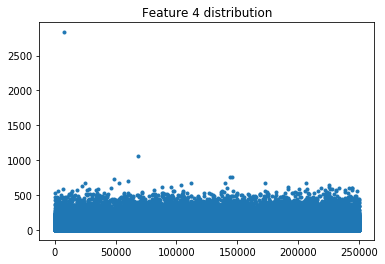

In [23]:
plt.scatter(index, feature_4, marker='.')
plt.title("Feature 4 distribution")

Text(0.5, 1.0, 'Boxplot for feature 4')

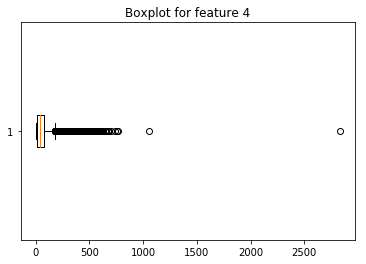

In [24]:
plt.boxplot(feature_4, vert=False)
plt.title("Boxplot for feature 4")

Text(0.5, 1.0, 'Boxplot for feature 4 without outliers')

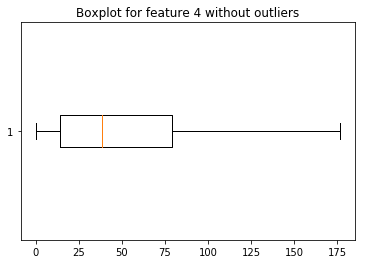

In [25]:
plt.boxplot(feature_4, vert=False, showfliers=False)
plt.title("Boxplot for feature 4 without outliers")

Same conclusions as features 2 and 3. Significant data seems contained in range 0 to 175

### Feature 5

In [26]:
feature_5 = tX[:,4]
feature_5

array([ 9.10e-01, -9.99e+02, -9.99e+02, ..., -9.99e+02, -9.99e+02,
       -9.99e+02])

Text(0.5, 1.0, 'Feature 5 distribution')

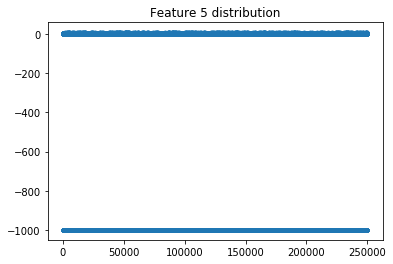

In [27]:
plt.scatter(index, feature_5, marker='.')
plt.title("Feature 5 distribution")

This time again, we seem to have -999 points. The rest of the data points seem rather contained too

In [28]:
#let's remove the -999
cleaned_feature = []
for x in feature_5:
    if x != -999:
        cleaned_feature.append(x)
len(cleaned_feature)

72543

Text(0.5, 1.0, 'Feature 5 distribution without -999')

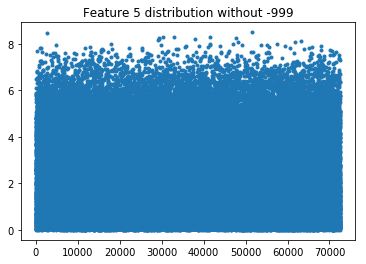

In [29]:
cleaned_index = [i for i in range(len(cleaned_feature))]
plt.scatter(cleaned_index, cleaned_feature, marker='.')
plt.title("Feature 5 distribution without -999")

Text(0.5, 1.0, 'Boxplot for feature 5')

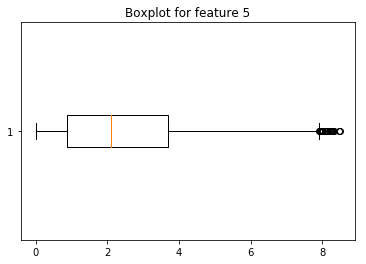

In [30]:
plt.boxplot(cleaned_feature, vert=False)
plt.title("Boxplot for feature 5")

Text(0.5, 1.0, 'Boxplot for feature 5 without outliers')

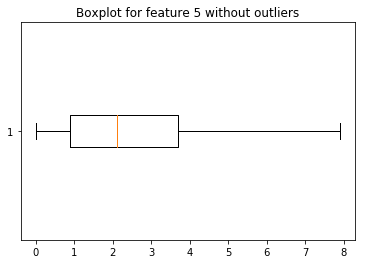

In [31]:
plt.boxplot(cleaned_feature, vert=False, showfliers=False)
plt.title("Boxplot for feature 5 without outliers")

When the -999 points are removed, we seem to have significant data contained in range 0 to 8, with not many outliers compared to other features. We can also see that we have a lot more -999 points in feature 5 than in feature 1. So not only do they not refer to the same points as feature 1, but removing them might leave us with a considerably smaller dataset

### Feature 6

In [32]:
feature_6 = tX[:,5]
feature_6

array([ 124.711, -999.   , -999.   , ..., -999.   , -999.   , -999.   ])

Text(0.5, 1.0, 'Feature 6 distribution')

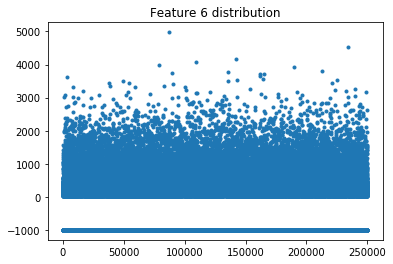

In [33]:
plt.scatter(index, feature_6, marker='.')
plt.title("Feature 6 distribution")

This time again, we seem to have -999 points.

In [34]:
#let's remove the -999
cleaned_feature = []
for x in feature_6:
    if x != -999:
        cleaned_feature.append(x)
len(cleaned_feature)

72543

Text(0.5, 1.0, 'Feature 6 distribution without -999')

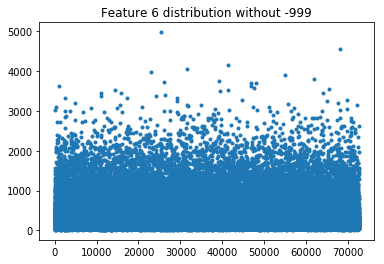

In [35]:
cleaned_index = [i for i in range(len(cleaned_feature))]
plt.scatter(cleaned_index, cleaned_feature, marker='.')
plt.title("Feature 6 distribution without -999")

Text(0.5, 1.0, 'Boxplot for feature 6')

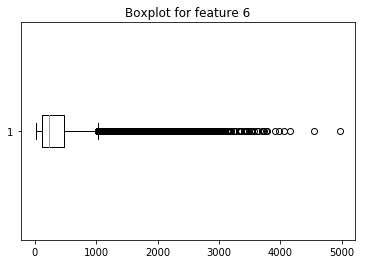

In [36]:
plt.boxplot(cleaned_feature, vert=False)
plt.title("Boxplot for feature 6")

Text(0.5, 1.0, 'Boxplot for feature 6 without outliers')

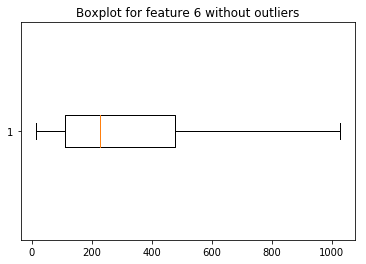

In [37]:
plt.boxplot(cleaned_feature, vert=False, showfliers=False)
plt.title("Boxplot for feature 6 without outliers")

feature 6 and feature 5 seem to have the same number of -999 points. We'll compare them below.

Significant data seems contained in range 0 to ~1000

In [38]:
feature_5_comparator = np.copy(feature_5)
for i in range(len(feature_5_comparator)):
    if feature_5_comparator[i] != -999:
        feature_5_comparator[i] = 0 #build comparator by zeroing non -999 data points
        
feature_6_comparator = np.copy(feature_6)
for i in range(len(feature_6_comparator)):
    if feature_6_comparator[i] != -999:
        feature_6_comparator[i] = 0 #build comparator by zeroing non -999 data points
        
#compare them
comparison = sum(abs(feature_5_comparator - feature_6_comparator))
comparison #if both vectors have the same -999 points, comparison = 0

0.0

We see that feature 5 and 6 have -999 points at the same id, so they probably are somehow linked.

### Feature 7

In [39]:
feature_7 = tX[:,6]
feature_7

array([   2.666, -999.   , -999.   , ..., -999.   , -999.   , -999.   ])

Text(0.5, 1.0, 'Feature 7 distribution')

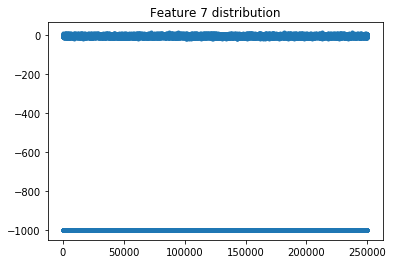

In [40]:
plt.scatter(index, feature_7, marker='.')
plt.title("Feature 7 distribution")

This time again, we seem to have -999 points.

In [41]:
#let's remove the -999
cleaned_feature = []
for x in feature_7:
    if x != -999:
        cleaned_feature.append(x)
len(cleaned_feature)

72543

Text(0.5, 1.0, 'Feature 7 distribution without -999')

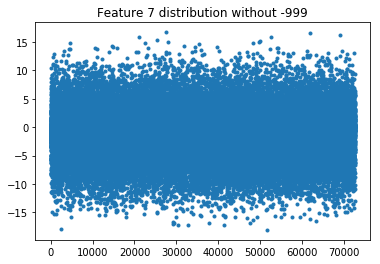

In [42]:
cleaned_index = [i for i in range(len(cleaned_feature))]
plt.scatter(cleaned_index, cleaned_feature, marker='.')
plt.title("Feature 7 distribution without -999")

Text(0.5, 1.0, 'Boxplot for feature 7')

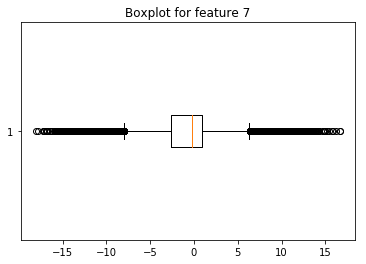

In [43]:
plt.boxplot(cleaned_feature, vert=False)
plt.title("Boxplot for feature 7")

Text(0.5, 1.0, 'Boxplot for feature 7 without outliers')

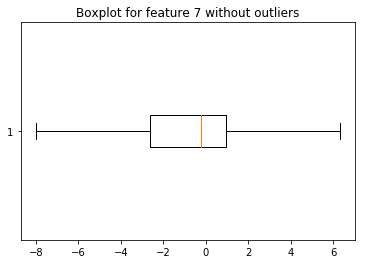

In [44]:
plt.boxplot(cleaned_feature, vert=False, showfliers=False)
plt.title("Boxplot for feature 7 without outliers")

feature 7 and features 5 and 6 seem to have the same number of -999 points. We'll compare them below.

This time data can be negative. The significant data rnages between -8 and 6 and seems to have a median around 0.

In [45]:
feature_7_comparator = np.copy(feature_7)
for i in range(len(feature_7_comparator)):
    if feature_7_comparator[i] != -999:
        feature_7_comparator[i] = 0 #build comparator by zeroing non -999 data points
        
feature_6_comparator = np.copy(feature_6)
for i in range(len(feature_6_comparator)):
    if feature_6_comparator[i] != -999:
        feature_6_comparator[i] = 0 #build comparator by zeroing non -999 data points
        
#compare them
comparison = sum(abs(feature_7_comparator - feature_6_comparator))
comparison #if both vectors have the same -999 points, comparison = 0

0.0

We can now link features 5, 6 and 7 as having the same number of -999 points

### Feature 8

In [46]:
feature_8 = tX[:,7]
feature_8

array([3.064, 3.473, 3.148, ..., 2.39 , 3.365, 2.025])

Text(0.5, 1.0, 'Feature 8 distribution')

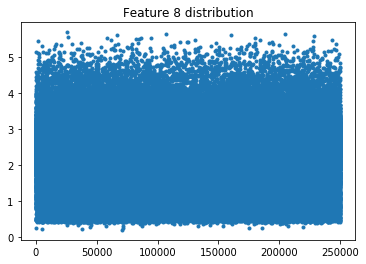

In [47]:
plt.scatter(index, feature_8, marker='.')
plt.title("Feature 8 distribution")

Text(0.5, 1.0, 'Boxplot for feature 8')

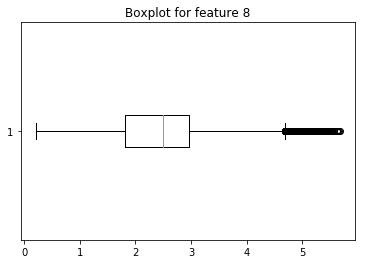

In [48]:
plt.boxplot(feature_8, vert=False)
plt.title("Boxplot for feature 8")

Text(0.5, 1.0, 'Boxplot for feature 8 without outliers')

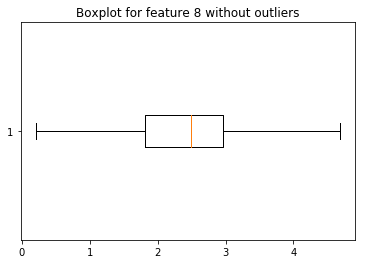

In [49]:
plt.boxplot(feature_8, vert=False, showfliers=False)
plt.title("Boxplot for feature 8 without outliers")

No -999 points this time. Significant data seems ranged between 0 and 5

### Feature 9

In [50]:
feature_9 = tX[:,8]
feature_9

array([41.928,  2.078,  9.336, ..., 22.183, 13.504,  7.479])

Text(0.5, 1.0, 'Feature 9 distribution')

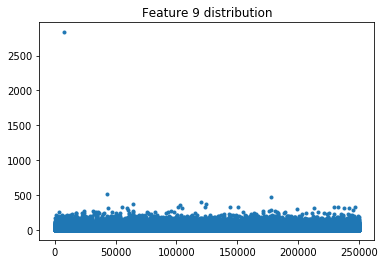

In [51]:
plt.scatter(index, feature_9, marker='.')
plt.title("Feature 9 distribution")

Text(0.5, 1.0, 'Boxplot for feature 9')

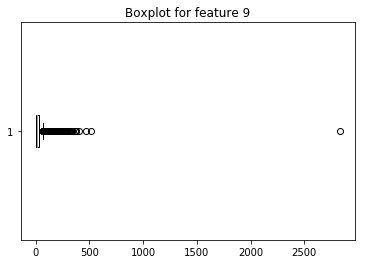

In [52]:
plt.boxplot(feature_9, vert=False)
plt.title("Boxplot for feature 9")

Text(0.5, 1.0, 'Boxplot for feature 9 without outliers')

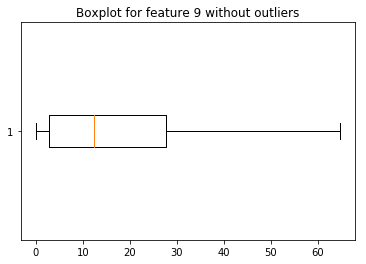

In [53]:
plt.boxplot(feature_9, vert=False, showfliers=False)
plt.title("Boxplot for feature 9 without outliers")

Same conclusions as feature 8. Significant data ranges between 0 and 70

### Feature 10

In [54]:
feature_10 = tX[:,9]
feature_10

array([197.76 , 125.157, 197.814, ..., 120.462,  55.859,  83.24 ])

Text(0.5, 1.0, 'Feature 10 distribution')

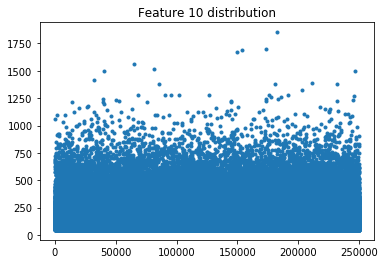

In [55]:
plt.scatter(index, feature_10, marker='.')
plt.title("Feature 10 distribution")

Text(0.5, 1.0, 'Boxplot for feature 10')

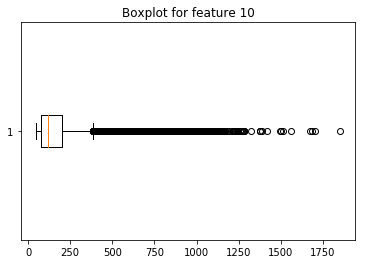

In [56]:
plt.boxplot(feature_10, vert=False)
plt.title("Boxplot for feature 10")

Text(0.5, 1.0, 'Boxplot for feature 10 without outliers')

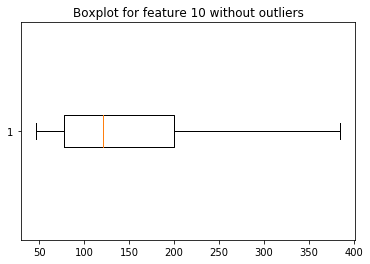

In [57]:
plt.boxplot(feature_10, vert=False, showfliers=False)
plt.title("Boxplot for feature 10 without outliers")

Same conclusions as feature 9. Significant data seems range between 50 and 400